##### **datos**

grillas

- nuemro de ejes en x
- numero de ejes en y
- numero de pisos

material:

- viga
- columna
- placa

cargas:

- en cada grado de libertad global

restricciones:

- siempre empotrado 12EI/L2


- matriz de tranformacion de elemento a portico
- implementar consideraciones, para matriz con brazos regidos

- matriz de transformacion de portico a estructura

- analisis modal espectral -> periodos

- analisis tiempo historia


#### **DEFINICION GRILLAS, NUEMRO DE PISOS Y MATERIALES**


In [72]:
import numpy as np
import pandas as pd

In [73]:
# NUMERO DE GRILLAS
NgrX = 3
NgrY = 3
Nstory = 2

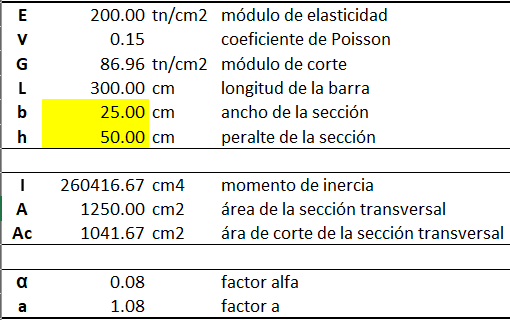 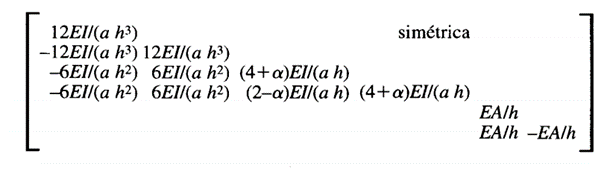 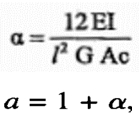


In [74]:
# DEFINIR MATERIALES
# VIGAS
E_vigas = 200
V_vigas = 0.15
G_vigas = E_vigas/(2*(1+V_vigas))
L_vigas = 300
b_vigas = 25
h_vigas = 50

I_vigas = b_vigas*h_vigas**3/12
A_vigas = b_vigas*h_vigas
Acorte_vigas = A_vigas/1.2

alpha_vigas = 12*E_vigas*I_vigas/(L_vigas**2*G_vigas*Acorte_vigas)
a_vigas = 1 + alpha_vigas

print(E_vigas, V_vigas, G_vigas, L_vigas, b_vigas, h_vigas,
      I_vigas, A_vigas, Acorte_vigas, alpha_vigas, a_vigas)

200 0.15 86.95652173913044 300 25 50 260416.66666666666 1250 1041.6666666666667 0.07666666666666666 1.0766666666666667


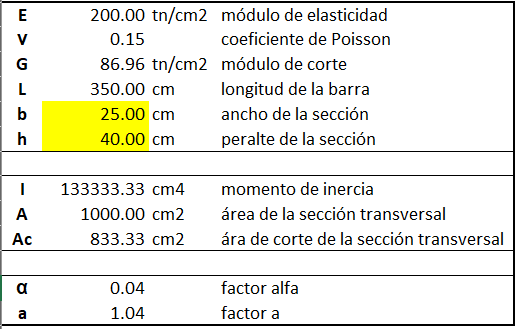


In [75]:
# DEFINIR MATERIALES
# COLUMNAS
E_columnas = 200
V_columnas = 0.15
G_columnas = E_columnas/(2*(1+V_columnas))
L_columnas = 350
b_columnas = 25
h_columnas = 40

I_columnas = b_columnas*h_columnas**3/12
A_columnas = b_columnas*h_columnas
Acorte_columnas = A_columnas/1.2

alpha_columnas = 12*E_columnas*I_columnas / \
    (L_columnas**2*G_columnas*Acorte_columnas)
a_columnas = 1 + alpha_columnas

print(E_columnas, V_columnas, G_columnas, L_columnas, b_columnas, h_columnas,
      I_columnas, A_columnas, Acorte_columnas, alpha_columnas, a_columnas)

200 0.15 86.95652173913044 350 25 40 133333.33333333334 1000 833.3333333333334 0.03604897959183673 1.0360489795918366


In [76]:
# DEFINIR MATERIALES
# PLACAS
E_placas = 200
V_placas = 0.15
G_placas = E_placas/(2*(1+V_placas))
L_placas = 300
b_placas = 25
h_placas = 50

I_placas = b_placas*h_placas**3/12
A_placas = b_placas*h_placas
Acorte_placas = A_placas/1.2

alpha_placas = 12*E_placas*I_placas/(L_placas**2*G_placas*Acorte_placas)
a_placas = 1 + alpha_placas

print(E_placas, V_placas, G_placas, L_placas, b_placas, h_placas,
      I_placas, A_placas, Acorte_placas, alpha_placas, a_placas)

200 0.15 86.95652173913044 300 25 50 260416.66666666666 1250 1041.6666666666667 0.07666666666666666 1.0766666666666667


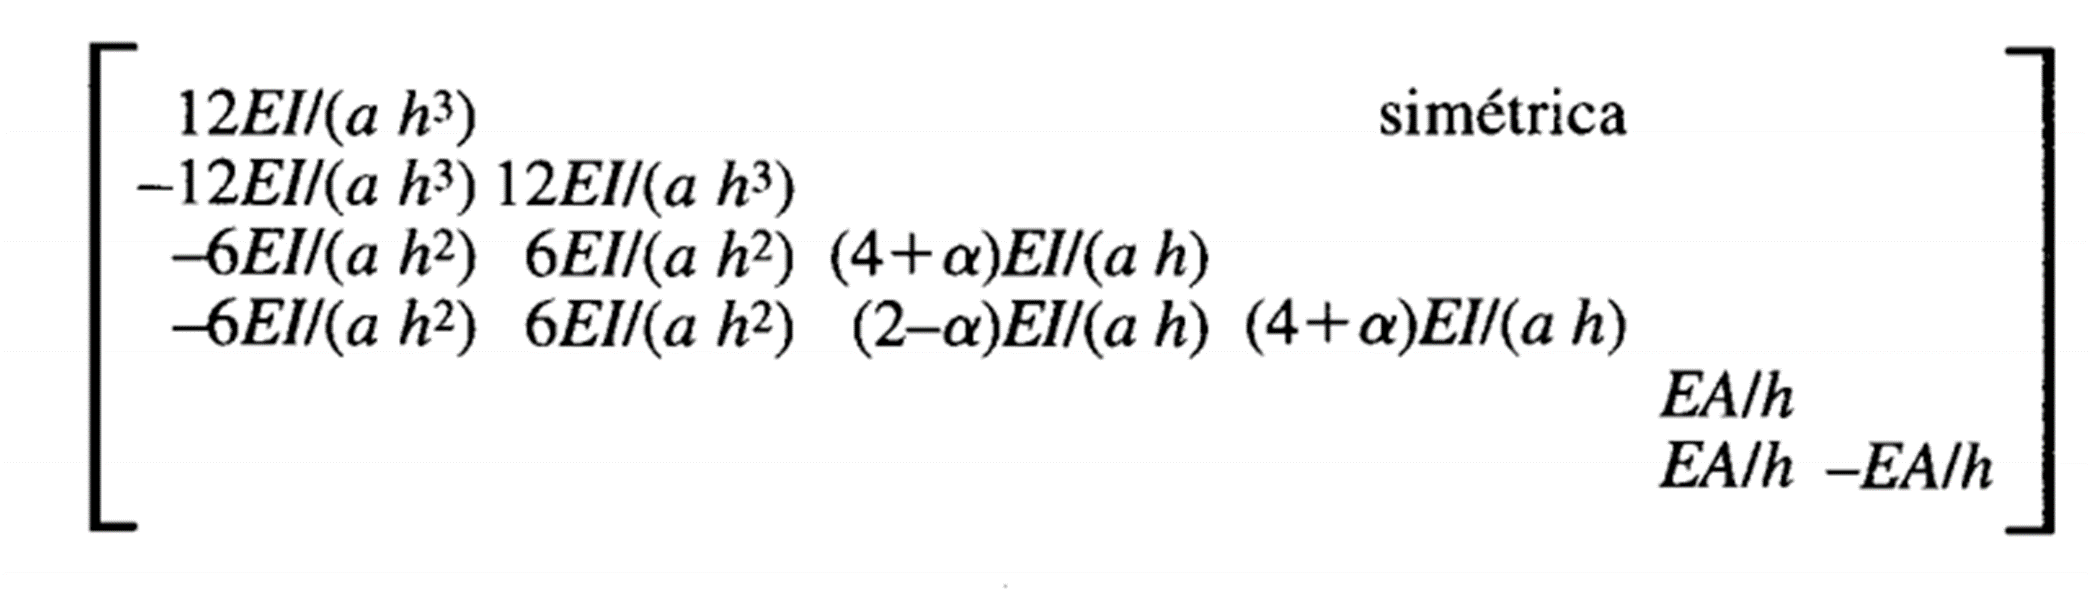


In [77]:

# Cálculo de la matriz de rigidez
# columna 1
k11 = 12 * E_vigas * I_vigas / (a_vigas * L_vigas**3)
k21 = -k11
k31 = -6 * E_vigas * I_vigas / (a_vigas * L_vigas**2)
k41 = k31
k51 = 0
k61 = 0
# columna 2
k12 = k21
k22 = k11
k32 = -k31
k42 = -k41
k52 = 0
k62 = 0
# columna 3
k13 = k31
k23 = k32
k33 = (4 + alpha_vigas) * E_vigas * I_vigas / (a_vigas * L_vigas)
k43 = (2 - alpha_vigas) * E_vigas * I_vigas / (a_vigas * L_vigas)
k53 = 0
k63 = 0
# columna 4
k14 = k41
k24 = k42
k34 = k43
k44 = k33
k54 = 0
k64 = 0
# columna 5
k15 = k51
k25 = k52
k35 = k53
k45 = k54
k55 = E_vigas * A_vigas / L_vigas
k65 = -k55
# columna 6
k16 = k61
k26 = k62
k36 = k63
k46 = k64
k56 = k65
k66 = k55


K_vigas = np.array([[k11, k12, k13, k14, k15, k16],
                    [k21, k22, k23, k24, k25, k26],
                    [k31, k32, k33, k34, k35, k36],
                    [k41, k42, k43, k44, k45, k46],
                    [k51, k52, k53, k54, k55, k56],
                    [k61, k62, k63, k64, k65, k66]])

# Crear un DataFrame
df_K_vigas = pd.DataFrame(K_vigas, columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6'],
                          index=['d1', 'd2', 'd3', 'd4', 'd5', 'd6'])

# Mostrar el DataFrame redondeado a 2 decimales
print(df_K_vigas.round(3))
df_K_vigas.round(3)

          d1        d2          d3          d4       d5       d6
d1    21.500   -21.500   -3224.974   -3224.974    0.000    0.000
d2   -21.500    21.500    3224.974    3224.974    0.000    0.000
d3 -3224.974  3224.974  657357.241  310135.019    0.000    0.000
d4 -3224.974  3224.974  310135.019  657357.241    0.000    0.000
d5     0.000     0.000       0.000       0.000  833.333 -833.333
d6     0.000     0.000       0.000       0.000 -833.333  833.333


,d1,d2,d3,d4,d5,d6
d1,21.500,-21.500,-3224.974,-3224.974,0.000,0.000
d2,-21.500,21.500,3224.974,3224.974,0.000,0.000
d3,-3224.974,3224.974,657357.241,310135.019,0.000,0.000
d4,-3224.974,3224.974,310135.019,657357.241,0.000,0.000
d5,0.000,0.000,0.000,0.000,833.333,-833.333
d6,0.000,0.000,0.000,0.000,-833.333,833.333


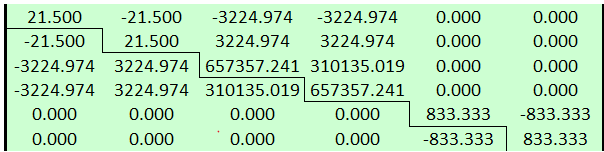


In [78]:
# COLUMNAS
# columna 1
k11 = 12 * E_columnas * I_columnas / (a_columnas * L_columnas**3)
k21 = -k11
k31 = -6 * E_columnas * I_columnas / (a_columnas * L_columnas**2)
k41 = k31
k51 = 0
k61 = 0
# columna 2
k12 = k21
k22 = k11
k32 = -k31
K42 = -k41
k52 = 0
k62 = 0
# columna 3
k13 = k31
k23 = k32
k33 = (4 + alpha_columnas) * E_columnas * \
    I_columnas / (a_columnas * L_columnas)
k43 = (2 - alpha_columnas) * E_columnas * \
    I_columnas / (a_columnas * L_columnas)
k53 = 0
k63 = 0
# columna 4
k14 = k41
k24 = k42
k34 = k43
k44 = k33
k54 = 0
k64 = 0
# columna 5
k15 = k51
k25 = k52
k35 = k53
k45 = k54
k55 = E_columnas * A_columnas / L_columnas
k65 = -k55
# columna 6
k16 = k61
k26 = k62
k36 = k63
k46 = k64
k56 = k65
k66 = k55

K_columnas = np.array([[k11, k12, k13, k14, k15, k16],
                       [k21, k22, k23, k24, k25, k26],
                       [k31, k32, k33, k34, k35, k36],
                       [k41, k42, k43, k44, k45, k46],
                       [k51, k52, k53, k54, k55, k56],
                       [k61, k62, k63, k64, k65, k66]])

# Crear un DataFrame
df_K_columnas = pd.DataFrame(K_columnas, columns=['d1', 'd2', 'd3', 'd4', 'd5', 'd6'],
                             index=['d1', 'd2', 'd3', 'd4', 'd5', 'd6'])

# Mostrar el DataFrame redondeado a 2 decimales
print(df_K_columnas.round(3))
df_K_columnas.round(3)

          d1        d2          d3          d4       d5       d6
d1     7.204    -7.204   -1260.676   -1260.676    0.000    0.000
d2    -7.204     7.204    1260.676    3224.974    0.000    0.000
d3 -1260.676  1260.676  296808.838  144427.886    0.000    0.000
d4 -1260.676  3224.974  144427.886  296808.838    0.000    0.000
d5     0.000     0.000       0.000       0.000  571.429 -571.429
d6     0.000     0.000       0.000       0.000 -571.429  571.429


,d1,d2,d3,d4,d5,d6
d1,7.204,-7.204,-1260.676,-1260.676,0.000,0.000
d2,-7.204,7.204,1260.676,3224.974,0.000,0.000
d3,-1260.676,1260.676,296808.838,144427.886,0.000,0.000
d4,-1260.676,3224.974,144427.886,296808.838,0.000,0.000
d5,0.000,0.000,0.000,0.000,571.429,-571.429
d6,0.000,0.000,0.000,0.000,-571.429,571.429


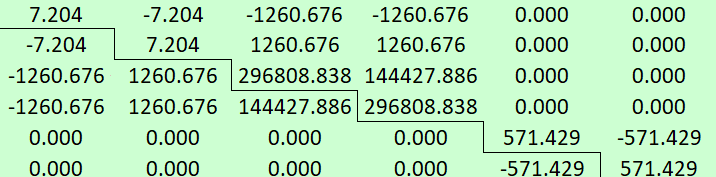


In [79]:
k41

-1260.6763528633114